In [1]:
import numpy
import random
import itertools
import pickle
import seaborn
import matplotlib.pyplot as plt

In [2]:
#### parameters
version = 1
num_categories = 388
num_categories_transformed = [1, 50, 100, 150, 200, 250, 300, 350, 388]
random.seed(version) # seed fixed
category_orders = [i for i in range(num_categories)]
random.shuffle(category_orders)

params1 = [1, 50, 100, 150, 200, 250, 300, 350, 388] # number of transformed categories
params2 = ['blur', 'scale', 'quantization'] # transformation types
params_comb = [p for p in itertools.product(params1, params2)]

In [22]:
#### load data
accuracies = numpy.zeros((len(params1), len(params2), 2)) # transformed, nontransformed
for i, p in enumerate(params_comb):
    num_category_transformed, transformation_type = p[0], p[1]
    with open('/Users/hojinjang/Desktop/DeepLearning/RobustFaceRecog/results/v1/id{}/analysis_v1_within_across_category_accuracy.pickle'.format(i+1), 'rb') as f:
        data = pickle.load(f)

    indices_transformed = [i for i, t in enumerate(data['target']) if t in category_orders[:num_category_transformed]]
    indices_nontransformed = [i for i, t in enumerate(data['target']) if t not in category_orders[:num_category_transformed]]

    if transformation_type == 'blur':
        param_of_interest = 3.
    elif transformation_type == 'scale':
        param_of_interest = 0.3
    elif transformation_type == 'quantization':
        param_of_interest = 0.3

    accuracies[params1.index(num_category_transformed), params2.index(transformation_type), 0] = \
        numpy.mean(data['correct1'][data['params'].index(param_of_interest), indices_transformed])
    accuracies[params1.index(num_category_transformed), params2.index(transformation_type), 1] = \
        numpy.mean(data['correct1'][data['params'].index(param_of_interest), indices_nontransformed])

/Users/hojinjang/opt/anaconda3/envs/pytorch1.12/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hojinjang/opt/anaconda3/envs/pytorch1.12/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


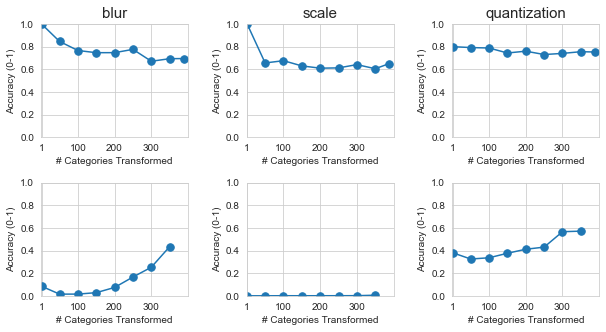

In [45]:
#### visualize
plt.figure(figsize=(10,5))

for i in range(2):
    for j in range(3):
        plt.subplot(2,3, 3*i+j+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.plot(params1, accuracies[:,j,i], '.-', markersize=15)
        plt.xlabel('# Categories Transformed')
        plt.ylabel('Accuracy (0-1)')
        plt.xticks([1, 100, 200, 300])
        plt.xlim([0,400])
        plt.ylim(0,1)

        if i == 0:
            plt.title(params2[j], fontdict = {'fontsize':15})